In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
upload=files.upload()
# Load your data
df = pd.read_csv('tech_layoffs.csv',encoding='latin')  # Replace with your dataset filenam
df

Saving tech_layoffs.csv to tech_layoffs (7).csv


,company,company_size,employees_fired
0,Apple,147000,0
1,Microsoft,181000,6000
2,Google,139500,15000
3,Amazon,1300000,12000
4,Facebook,60750,11000
...,...,...,...
95,Airbnb,448047,1012
96,Uber,1206139,51658
97,GoJek,302489,7084
98,Freshworks,646552,7670


In [15]:
# 1. Basic data overview
print(df.head())
print(df.info())
print(df.describe())
print("Missing values:\n", df.isnull().sum())
print(f'Duplicates: {df.duplicated().sum()}')


     company  company_size  employees_fired
0      Apple        147000                0
1  Microsoft        181000             6000
2     Google        139500            15000
3     Amazon       1300000            12000
4   Facebook         60750            11000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   company          100 non-null    object
 1   company_size     100 non-null    int64 
 2   employees_fired  100 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 2.5+ KB
None
       company_size  employees_fired
count  1.000000e+02       100.000000
mean   7.557156e+05     57355.620000
std    4.615541e+05     52862.274156
min    7.137000e+03         0.000000
25%    3.370110e+05     12968.250000
50%    8.116580e+05     42510.500000
75%    1.180989e+06     94080.750000
max    1.468680e+06    206083.000000
Missing values:
 com

In [35]:
# 2. Layoff percentage calculation
df['Layoff_Percentage'] = (df['employees_fired'] / df['company_size'] * 100).round(2)
print(df.sort_values(by='Layoff_Percentage',ascending=False).head(10))

       company  company_size  employees_fired  Layoff_Percentage
4     Facebook         60750            11000              18.11
40     CureFit        497712            74175              14.90
36     Shopify        449561            66606              14.82
33  Salesforce        633768            92624              14.61
63  MakeMyTrip       1424064           206083              14.47
21          HP        905375           130595              14.42
27    DoorDash       1240414           176429              14.22
13   BigBasket         35514             5023              14.14
75      Byju's        858258           121180              14.12
89    Razorpay       1387660           191727              13.82


In [17]:
# 3. Summary statistics of key columns
print(df[['company_size', 'employees_fired', 'Layoff_Percentage']].describe())

       company_size  employees_fired  Layoff_Percentage
count  1.000000e+02       100.000000         100.000000
mean   7.557156e+05     57355.620000           7.384200
std    4.615541e+05     52862.274156           4.705331
min    7.137000e+03         0.000000           0.000000
25%    3.370110e+05     12968.250000           2.815000
50%    8.116580e+05     42510.500000           7.470000
75%    1.180989e+06     94080.750000          10.762500
max    1.468680e+06    206083.000000          18.110000


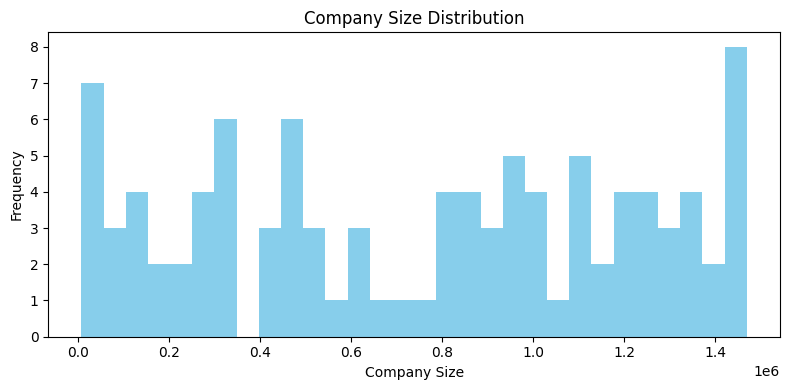

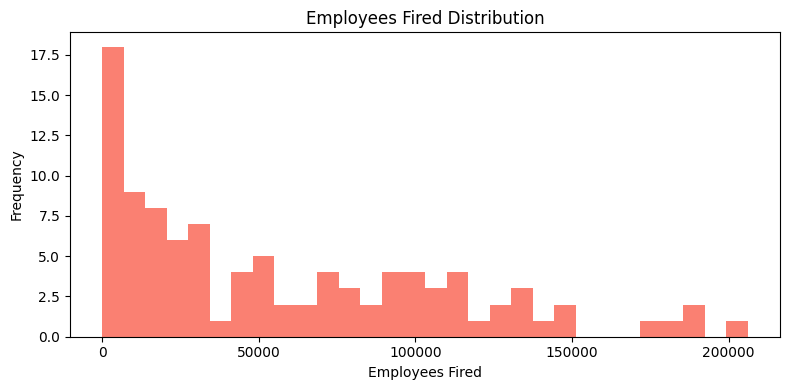

In [19]:
# 4. Distribution plots
plt.figure(figsize=(8,4))
plt.hist(df['company_size'], bins=30, color='skyblue')
plt.title('Company Size Distribution')
plt.xlabel('Company Size')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


plt.figure(figsize=(8,4))
plt.hist(df['employees_fired'], bins=30, color='salmon')
plt.title('Employees Fired Distribution')
plt.xlabel('Employees Fired')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


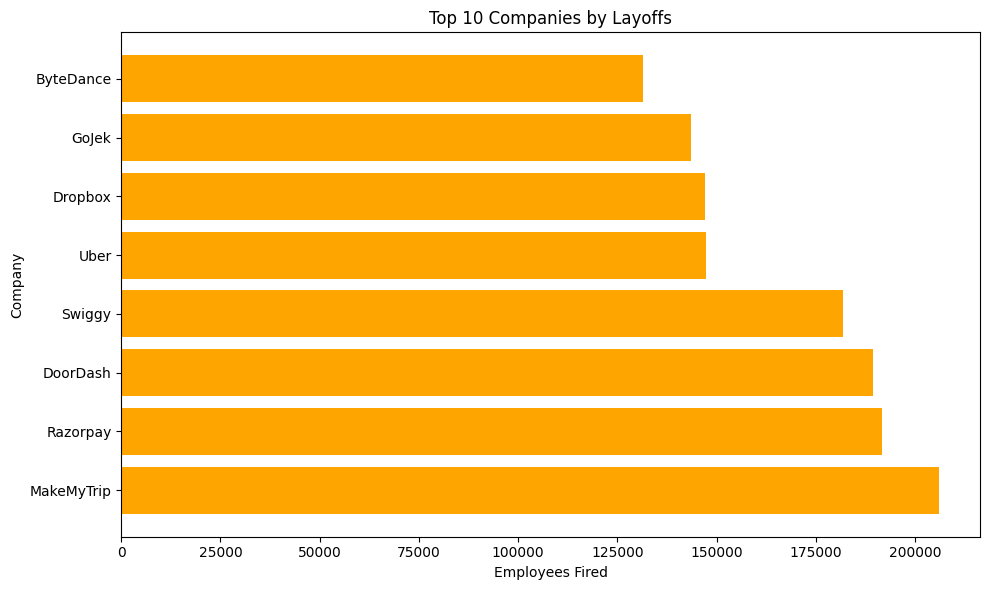

In [20]:
# 5. Top 10 companies by layoffs
top_layoffs = df.nlargest(10, 'employees_fired')
plt.figure(figsize=(10,6))
plt.barh(top_layoffs['company'], top_layoffs['employees_fired'], color='orange')
plt.xlabel('Employees Fired')
plt.ylabel('Company')
plt.title('Top 10 Companies by Layoffs')
plt.tight_layout()
plt.show()

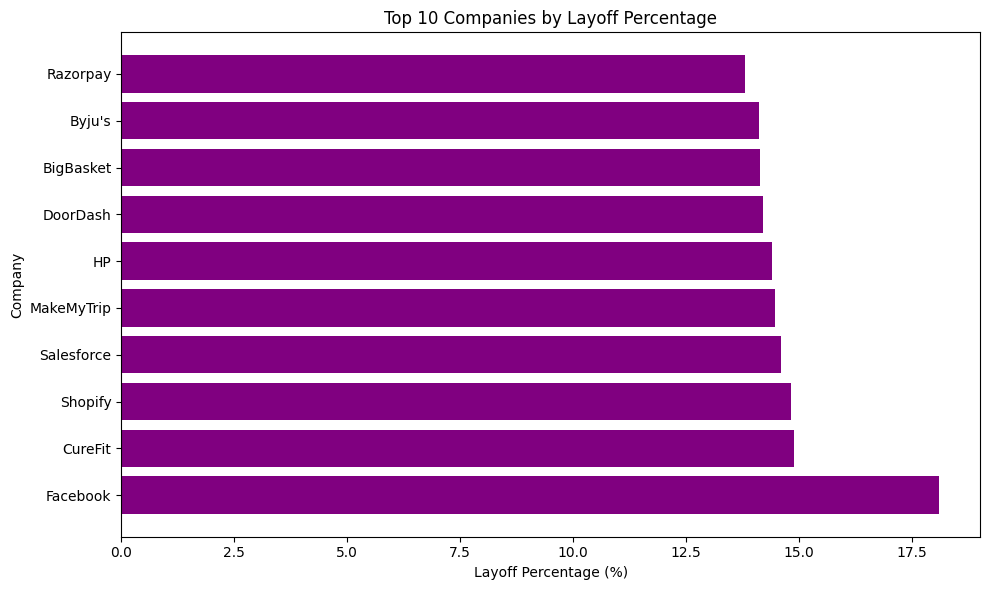

In [21]:

# 6. Top 10 companies by layoff percentage
top_layoff_pct = df.nlargest(10, 'Layoff_Percentage')
plt.figure(figsize=(10,6))
plt.barh(top_layoff_pct['company'], top_layoff_pct['Layoff_Percentage'], color='purple')
plt.xlabel('Layoff Percentage (%)')
plt.ylabel('Company')
plt.title('Top 10 Companies by Layoff Percentage')
plt.tight_layout()
plt.show()

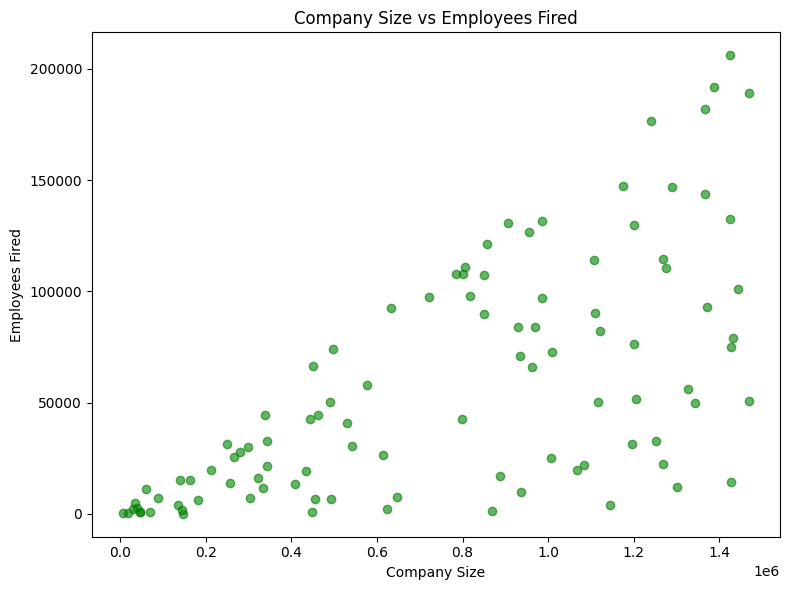

In [22]:
# 7. Scatter plot - Company size vs Employees fired
plt.figure(figsize=(8,6))
plt.scatter(df['company_size'], df['employees_fired'], alpha=0.6, color='green')
plt.title('Company Size vs Employees Fired')
plt.xlabel('Company Size')
plt.ylabel('Employees Fired')
plt.tight_layout()
plt.show()

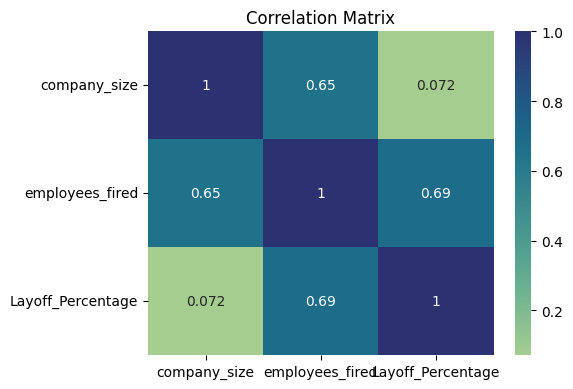

In [23]:
# 8. Correlation analysis
plt.figure(figsize=(6,4))
sns.heatmap(df[['company_size','employees_fired','Layoff_Percentage']].corr(), annot=True, cmap='crest')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

company
DoorDash        442217
Swiggy          406104
Razorpay        324241
Meesho          293728
Byju's          278290
HP              278170
GoJek           248509
Atlassian       244486
GitHub          231301
MakeMyTrip      206083
Uber            199073
CureFit         181832
Freshworks      149520
Dropbox         147022
Reddit          139603
Pinterest       136991
Salesforce      136787
ByteDance       131593
WeWork          130604
Shopify         123991
Grab            120953
Bitbucket       118427
Snapdeal         97766
Flipkart         93094
PhonePe          89997
PolicyBazaar     83852
Unacademy        79039
Netflix          76996
Palantir         72661
Lenskart         68778
Intel            61277
Airbnb           51366
Oracle           50166
EaseMyTrip       44492
IBM              32829
TikTok           31572
Slack            22710
Nvidia           19386
AMD              19157
Google           15000
Square           14218
Amazon           12000
Facebook         11000
Mic

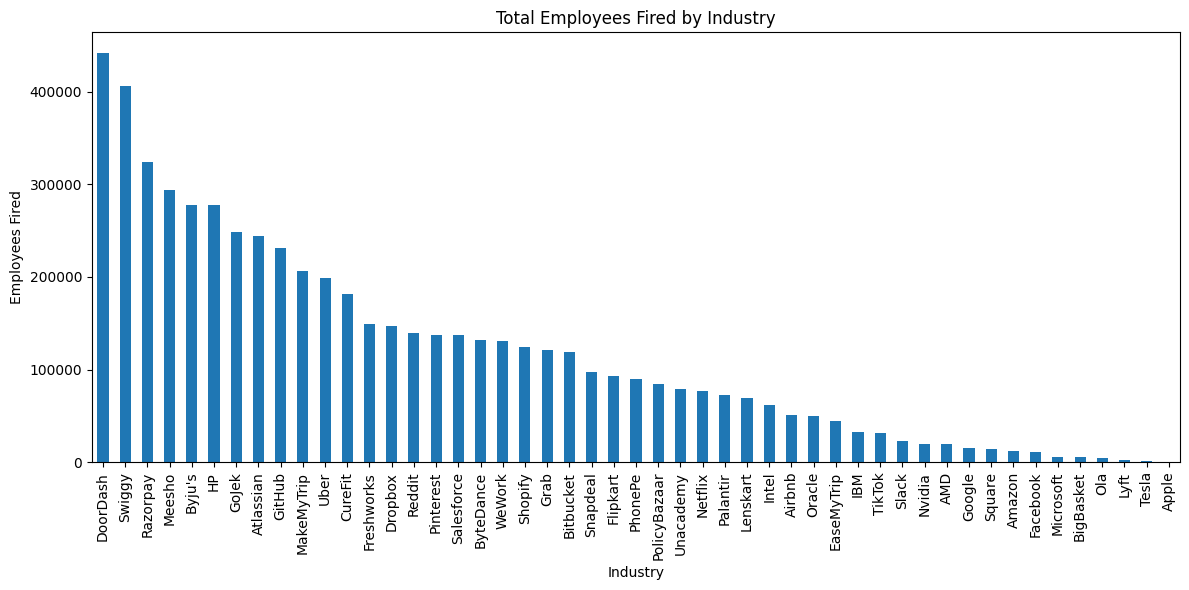

In [33]:

# 9. Group by industry or type if available (replace 'industry'/'type' with your column)
if 'company' in df.columns:
    by_industry = df.groupby('company')['employees_fired'].sum().sort_values(ascending=False)
    print(by_industry)

    plt.figure(figsize=(12,6))
    by_industry.plot(kind='bar')
    plt.title('Total Employees Fired by Industry')
    plt.xlabel('Industry')
    plt.ylabel('Employees Fired')
    plt.tight_layout()
    plt.show()